In [17]:
#import libraries
import numpy as np
import math
from operator import itemgetter
import random
from matplotlib import pyplot as plt

#params
nd = 100 #num of trials
nmax = 100 #num of epochs
N = 20 #num of features
alphas = np.linspace(0.1, 10, 100) #alpha

av_errors = [] #av gen errors
for alpha in alphas:
    P = int(alpha * N) #num of samples
    sum_errors = [] #gen error calculation
    
    for j in range(nd):
        
        #prepare all vectors
        mu, sigma = 0, 1
        xi = np.random.normal(mu, sigma, [P, N]) #initial values
        w_t = np.random.normal(mu, sigma, N) #initial weights, teacher weights, have to be random not just '1'
        w_t = w_t * np.sqrt(N) / np.linalg.norm(w_t,2)
        S = np.sign(np.dot(xi, w_t)) #initial labels (teacher weights),
                                     #they are the products of weights and xi vector
        w = np.zeros(N) #learned weights (students weights)

        converg = 0 #check convergence
        initial_lowest_stab = 0 #initial κν; t=0
        
        for i in range(nmax): #actual algorithm starts here
    
            data = []
    
            #calculate κν(t)
            for mu_t in range(P):
                current_example = xi[mu_t]
                e_mu_t = np.dot(np.dot(current_example, w), S[mu_t])
                data.append([e_mu_t, xi[mu_t], S[mu_t]])
        
            #determine the minimal stability
            data = sorted(data, key=itemgetter(0), reverse=False)
            lowest_stab = data[0][0]
    
            #determine the sample with minimal stability and its label
            min_data = data[0][1]
            min_label = data[0][2]
    
            #hebbian update
            w = w+(min_data*min_label)/N
    
            if lowest_stab >= initial_lowest_stab: #if the algorithm found the larger distance
                initial_lowest_stab = lowest_stab
                converge = 0 #then the algorithm converges
            else: #if the distance with the new example that the algorithm found is larger the one that we already have
                converge = converge+1 #then increase counter by 1
                if converge >= P: #once it reaches threshold (larger than P as it is stated in the assignment)
                    break #stop the algorithm
            
        #calculate the error
        error = 1/np.pi * math.acos((np.dot(w, w_t))/(np.linalg.norm(w,2)*np.linalg.norm(w_t,2)))
        sum_errors.append(error)
    
    av_error = sum(sum_errors)/len(sum_errors)
    print('alpha:')
    print(alpha)
    print('av error:')
    print(av_error)
    print('\n')
    av_errors.append(av_error)

0.41951604166488626
0.3774955435486929
0.3591746504614843
0.34708544977712863
0.3229827661244881
0.30941334915205265
0.28562710763358906
0.2824786275434786
0.27206832811370574
0.26335403985122646
0.2505590122006687
0.24210225808815053
0.23431832078064152
0.22496469645556538
0.21462993797773414
0.20440288519626812
0.20322383028429175
0.1855387493546381
0.1907147773482729
0.18368061434279206
0.17622809253618152
0.17406107554800554
0.1699275997705818
0.1635295932940094
0.15835669547479442
0.1545740235312557
0.1494323288078859
0.14688847835960195
0.1450713422113209
0.14588811072826247
0.14295592047791136
0.1377928933641048
0.1301078031727854
0.12968651129807657
0.12379886490649933
0.12360857984902536
0.12285618470185636
0.12183655892247396
0.12011664259208624
0.12430550156344175
0.11773326699921097
0.11554797331534998
0.11068568080154753
0.11432125020727395
0.10984395362773444
0.10791880774368529
0.11082096681735003
0.10754704550096622
0.10285566343323735
0.10246360809685658
0.101501973454

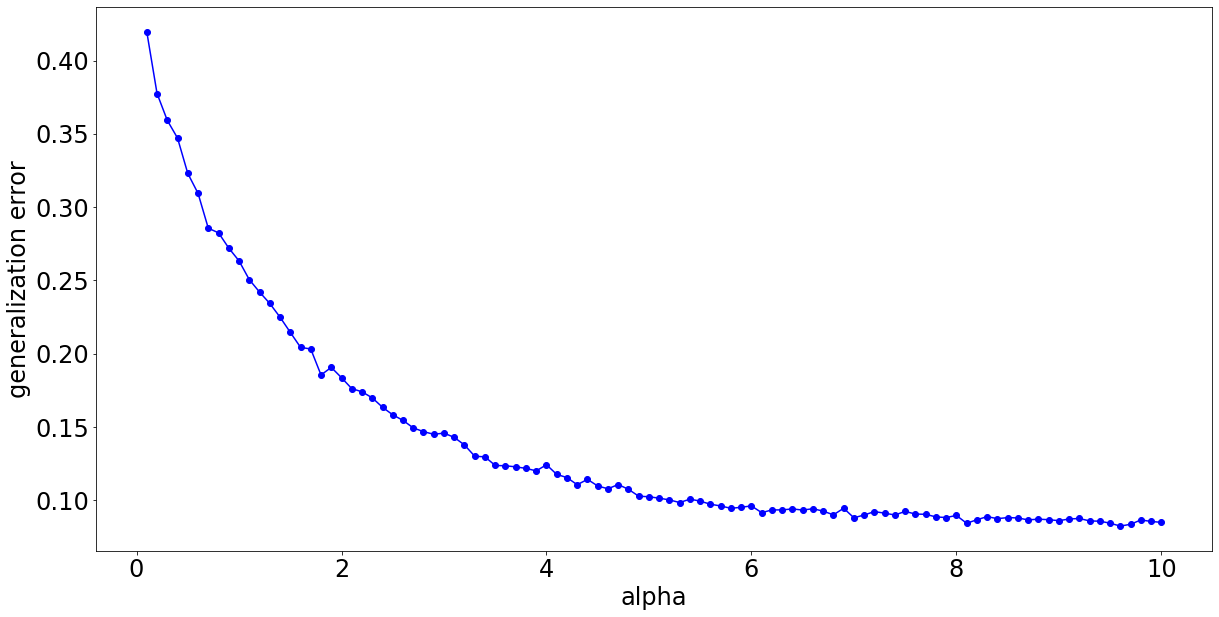

In [18]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.plot(alphas, av_errors, marker='o', linestyle='-', color='b')
plt.xlabel('alpha')
plt.ylabel('generalization error')
plt.show()